In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# G = nx.Graph()
G = nx.DiGraph()  # Create a directed graph instead of an undirected one

G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("A", "D")

G.add_edge("B", "D")

G.add_edge("C", "D")
G.add_edge("C", "E")
G.add_edge("C", "F")

G.add_edge("E", "G")

G.add_edge("G", "H")
G.add_edge("G", "I")

G.add_edge("F", "J")
G.add_edge("F", "K")

nx.shortest_path(G, "A", "D", weight="weight")


['A', 'D']

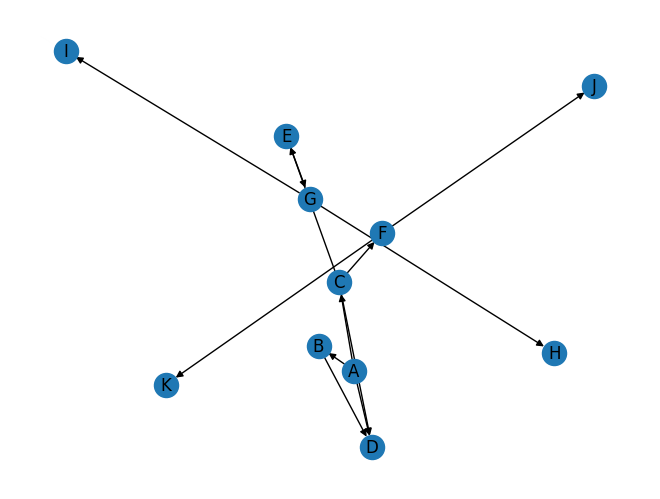

In [13]:
# show graph
nx.draw(G, with_labels=True)
plt.show()

Nodes in newSubtree: ['A', 'C', 'E', 'G', 'I', 'F']
Edges in newSubtree: [('A', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'G'), ('G', 'I')]


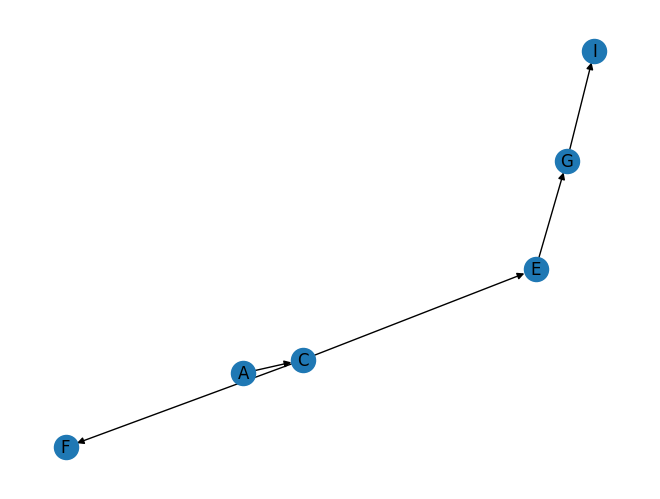

In [18]:
itemsChanged = [
    "E", "F", "I"
]

def create_subtree(G, root, items_changed):
    def dfs(node, subtree):
        if node in items_changed or any(descendant in items_changed for descendant in nx.descendants(G, node)):
            subtree.add_node(node)
            for child in G.successors(node):
                if child not in subtree:
                    dfs(child, subtree)
                if child in subtree:
                    subtree.add_edge(node, child)

    new_subtree = nx.DiGraph()
    dfs(root, new_subtree)
    return new_subtree

# Create the new subtree
root = "A"
newSubtree = create_subtree(G, root, itemsChanged)

# Print the nodes and edges in the new subtree
print("Nodes in newSubtree:", list(newSubtree.nodes()))
print("Edges in newSubtree:", list(newSubtree.edges()))

# show graph
nx.draw(newSubtree, with_labels=True)
plt.show()

In [19]:
def print_tree(G, node, level=0, prefix=""):
    print("  " * level + prefix + node)
    children = list(G.successors(node))
    for i, child in enumerate(children):
        if i == len(children) - 1:
            print_tree(G, child, level + 1, "└─ ")
        else:
            print_tree(G, child, level + 1, "├─ ")

# Print the tree structure
print("New Subtree Structure:")
print_tree(newSubtree, root)

New Subtree Structure:
A
  └─ C
    ├─ E
      └─ G
        └─ I
    └─ F


/var/folders/jn/7zg7jbsn4lq55sqjfc_jl2yw0000gn/T/ipykernel_71757/631632525.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


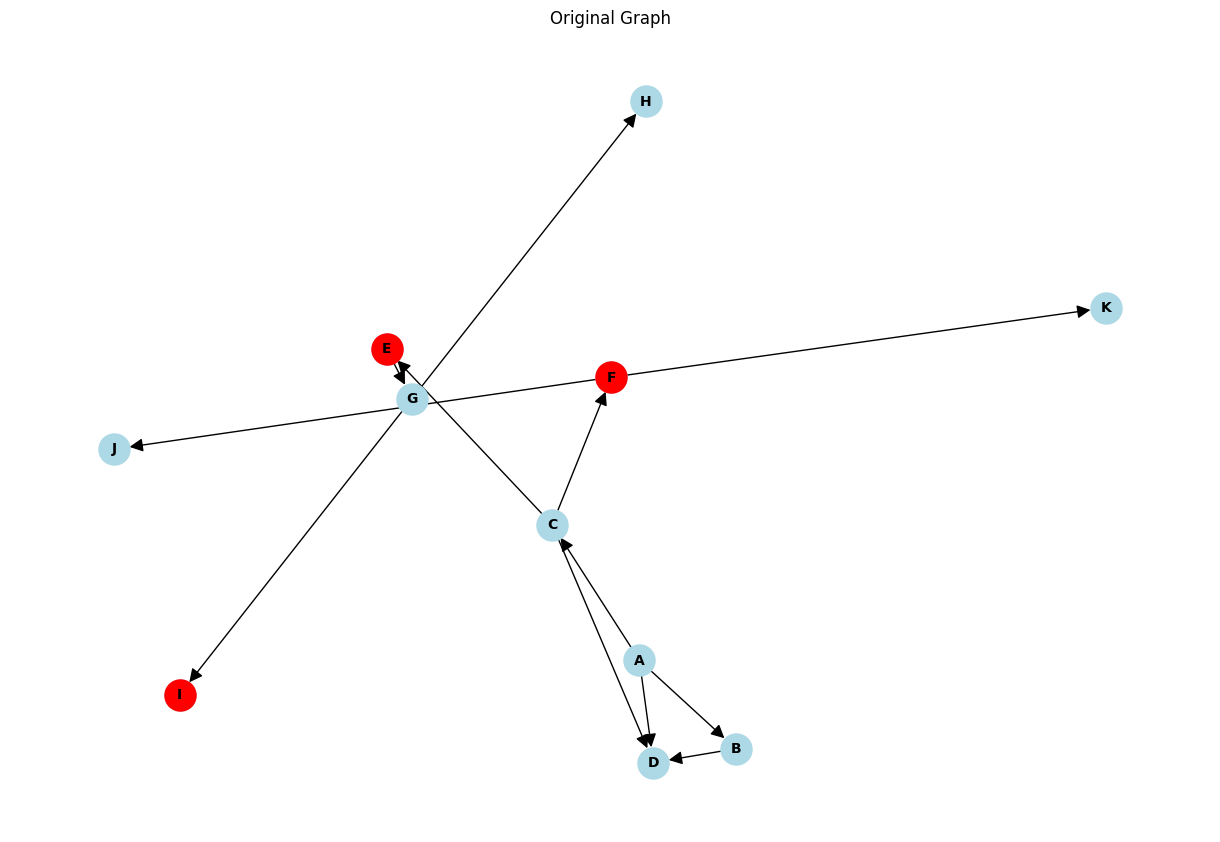

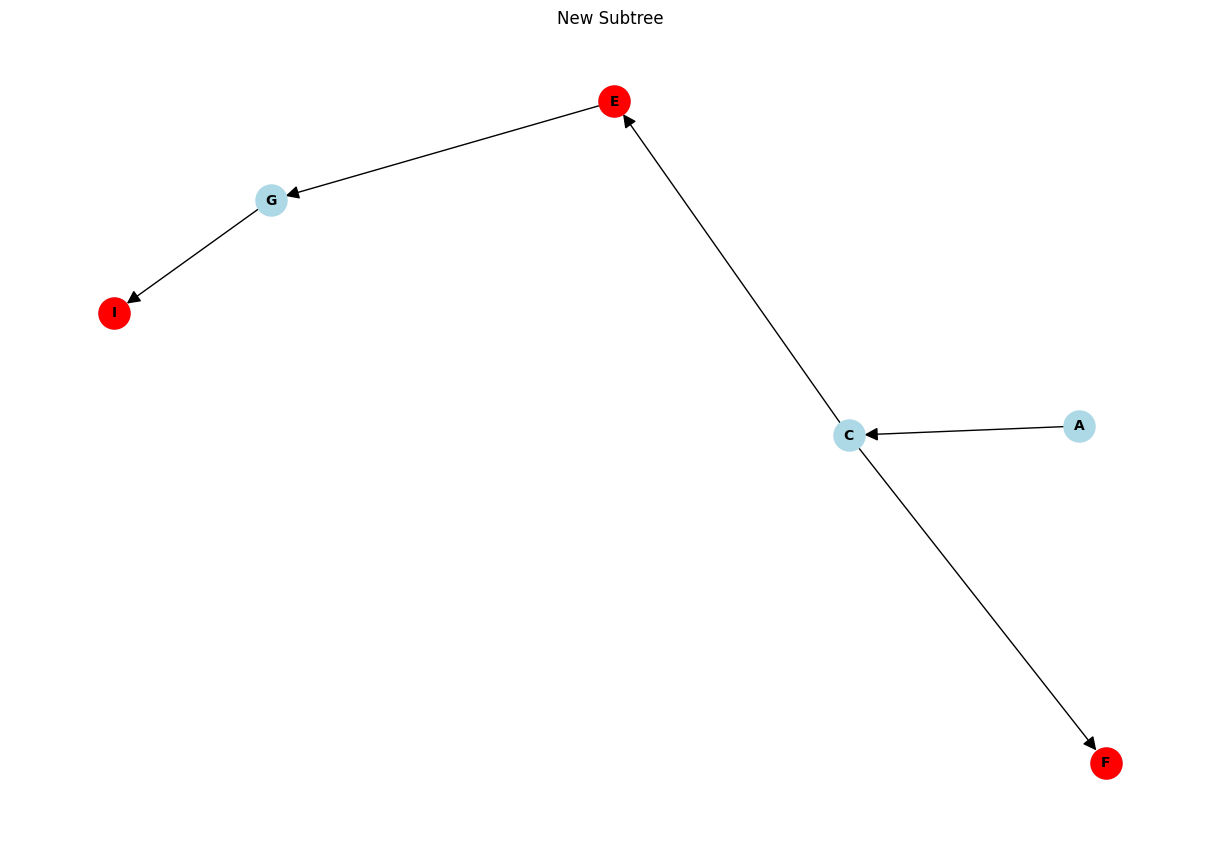

In [20]:

def plot_graph(G, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=500, font_size=10, font_weight='bold', 
            arrows=True, arrowsize=20)
    
    # Highlight changed nodes
    nx.draw_networkx_nodes(G, pos, nodelist=set(itemsChanged).intersection(set(G.nodes())), 
                           node_color='red', node_size=500)
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot original graph
plot_graph(G, "Original Graph")

# Plot new subtree
plot_graph(newSubtree, "New Subtree")